# Classification Report
A classification report is a performance evaluation tool used to assess the quality of
predictions made by a classification model.It provide various metrics such as precision,recall,
F1 score, and support for each class in the dataset.
Precision: **Precision is the fraction of true positive prediction(i.e. the number of correctly
predicted positive instances) out of all positive predictions made by the model.** It measures
the model's ability to correclty predict positive instances and avoid false positives.
Recall: **Recall is the fraction of true positive 
predictions out of all actual positive instances** in the dataset.It measures the model's ability to correctly idenfity all positive instances and avoid
false negatives
F1 scores: The **f1 score is the harmonic mean of precision and recall**. It provides a balances measures
of the model's overall performance in terms of both 
presision and recall.
Support Support is the number of instances of each 
class in the dataset.
The classification report typically presents these
metrics for each class in the dataset, as well as an overall weighted average of the metrics across all classes. It is useful tool for assessing the strengths and weaknesses of a classification model and identify areas for improvements

# Importing the Library

In [252]:
import numpy as np
import pandas as pd
#matplotlib
import matplotlib.pyplot as plt
#train_test_split
from sklearn.model_selection import train_test_split
#StandardScaler
from sklearn.preprocessing import StandardScaler
#tensorflow
import tensorflow as tf
#metrics
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

# Loading the Dataset

In [253]:
df=pd.read_csv('/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv')
#showing the dataset
df

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


# Getting the Preliminary Information about the Dataset

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

# Checking the Shape of the Dataset

In [255]:
df.shape

(671205, 20)

# Getting the Statistical Information about the dataset

In [256]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


# Performing Univariant Analysis on Categorical Features

In [257]:
top_country=df['country'].value_counts().reset_index(name='count').head(10)
top_country
top_country=top_country.rename(columns={'index':'country'})
top_country


,country,count
0,Philippines,160441
1,Kenya,75825
2,El Salvador,39875
3,Cambodia,34836
4,Pakistan,26857
5,Peru,22233
6,Colombia,21995
7,Uganda,20601
8,Tajikistan,19580
9,Ecuador,13521


In [258]:
region=df['region'].value_counts().reset_index(name='count')
region=region.head(10)
region=region.rename(columns={'index':'region'})
region

,region,count
0,Kaduna,10000
1,Lahore,7178
2,Rawalpindi,4496
3,Cusco,3841
4,Dar es Salaam,3719
5,Kisii,3546
6,"Palo, Leyte",3320
7,"Narra, Palawan",3197
8,"Quezon, Palawan",3120
9,Kitale,3104


In [259]:
repayment_interval=df['repayment_interval'].value_counts().reset_index(name='count')
repayment_interval=repayment_interval.rename(columns={'index':'Type of Repayment'})
repayment_interval


,Type of Repayment,count
0,monthly,342717
1,irregular,257158
2,bullet,70728
3,weekly,602


In [260]:
df['sector'].value_counts()

Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Entertainment        830
Wholesale            634
Name: sector, dtype: int64

In [261]:
currency_counts=df['currency'].value_counts().head(5)
currency_counts

PHP    160440
USD    105494
KES     75311
KHR     29498
PKR     26856
Name: currency, dtype: int64

# Checking for Missing Value in Each Column

In [262]:
df.isna().mean()

id                    0.000000
funded_amount         0.000000
loan_amount           0.000000
activity              0.000000
sector                0.000000
use                   0.006305
country_code          0.000012
country               0.000000
region                0.084624
currency              0.000000
partner_id            0.020124
posted_time           0.000000
disbursed_time        0.003570
funded_time           0.072006
term_in_months        0.000000
lender_count          0.000000
tags                  0.255385
borrower_genders      0.006289
repayment_interval    0.000000
date                  0.000000
dtype: float64

# Unique Value in Each Column

In [263]:
{column:len(df[column].unique()) for column in x.select_dtypes('object')}

{}

In [264]:
[column for column in x.select_dtypes('object')]

[]

# Creating Preprocessing Function

In [265]:
def convert_datetime(df,column):
    df=df.copy()
    df[column]=pd.to_datetime(df[column])
    df[column+'_y']=df[column].dt.year
    df[column+'_m']=df[column].dt.month
    df[column+'_d']=df[column].dt.day
    df=df.drop(column,axis=1)
    return df

In [266]:
df['borrower_genders'][0].split(',')

['female']

In [267]:
def male_count(x):
    count=0
    for male in str(x).split(', '):
        if male=='male':
            count+=1
    return count
def female_count(x):
    count=0
    for female in str(x).split(', '):
        if female=='female':
            count+=1
    return count

In [268]:
def onehot_encode(df,columns):
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df
        

In [269]:
df['repayment_interval'].unique()

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [289]:
def preprocess_inputs(df):
    df=df.copy()
    #dropping the id column
    df=df.drop(['id','use','tags','country','date','region','partner_id'],axis=1)
    df=convert_datetime(df,'posted_time')
    for column in ['disbursed_time','funded_time']:
        df[column]=df[column].fillna(df[column].mode()[0])
    df=convert_datetime(df,'disbursed_time')
    df=convert_datetime(df,'funded_time')
    df['male_count']=df['borrower_genders'].apply(male_count)
    df['female_count']=df['borrower_genders'].apply(female_count)
    df=df.drop('borrower_genders',axis=1)
    y=df['repayment_interval']
    x=df.drop('repayment_interval',axis=1)
    x=onehot_encode(x,[column for column in x.select_dtypes('object')])
    y=y.replace({'irregular':0,'bullet':1,'weekly':2,'monthly':3})
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    return x_train,x_test,y_train,y_test

In [290]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(469843, 346)
(201362, 346)
(469843,)
(201362,)


# Compling the Model

In [293]:
inputs=tf.keras.layers.Input(shape=(346,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(4,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 346)]             0         
                                                                 
 dense_6 (Dense)             (None, 64)                22208     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 26,628
Trainable params: 26,628
Non-trainable params: 0
_________________________________________________________________


In [294]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                                                                   patience=3,
                                                                                                                   restore_best_weights=True)])

Epoch 1/100
11747/11747 [==============================] - 28s 2ms/step - loss: 0.3118 - accuracy: 0.8801 - val_loss: 0.2625 - val_accuracy: 0.9005
Epoch 2/100
11747/11747 [==============================] - 27s 2ms/step - loss: 0.2438 - accuracy: 0.9085 - val_loss: 0.2392 - val_accuracy: 0.9096
Epoch 3/100
11747/11747 [==============================] - 26s 2ms/step - loss: 0.2265 - accuracy: 0.9147 - val_loss: 0.2289 - val_accuracy: 0.9145
Epoch 4/100
11747/11747 [==============================] - 28s 2ms/step - loss: 0.2175 - accuracy: 0.9180 - val_loss: 0.2207 - val_accuracy: 0.9174
Epoch 5/100
11747/11747 [==============================] - 26s 2ms/step - loss: 0.2104 - accuracy: 0.9204 - val_loss: 0.2159 - val_accuracy: 0.9209
Epoch 6/100
11747/11747 [==============================] - 27s 2ms/step - loss: 0.2047 - accuracy: 0.9228 - val_loss: 0.2138 - val_accuracy: 0.9207
Epoch 7/100
11747/11747 [==============================] - 26s 2ms/step - loss: 0.1997 - accuracy: 0.9251 - val_

In [295]:
model.evaluate(x_test,y_test)

6293/6293 [==============================] - 10s 2ms/step - loss: 0.1937 - accuracy: 0.9322


[0.19374679028987885, 0.9322314858436584]

In [301]:
y_pred=np.argmax(model.predict(x_test),axis=1)
cm=confusion_matrix(y_test,y_pred)

6293/6293 [==============================] - 8s 1ms/step


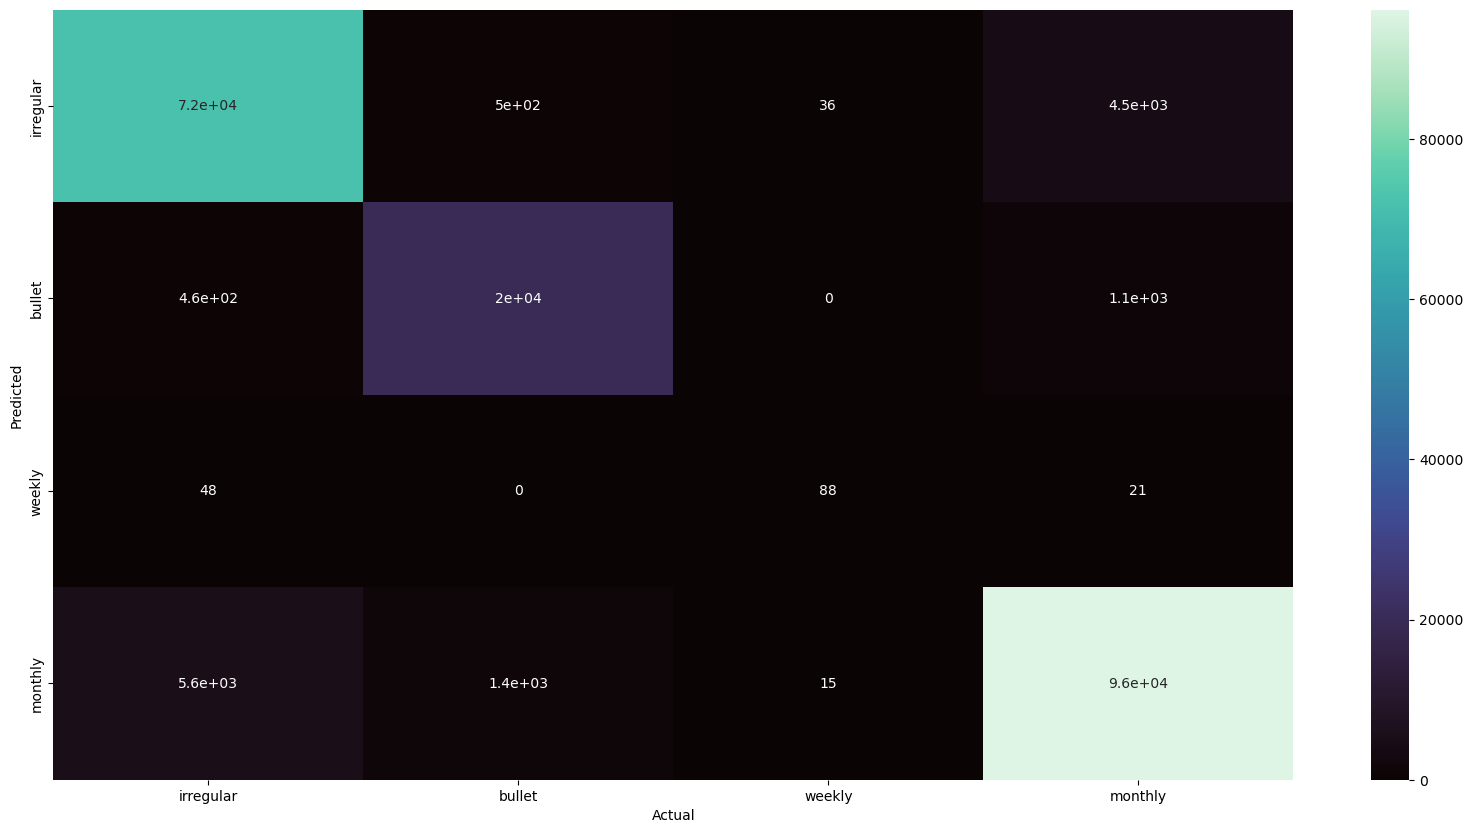

In [308]:
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True,cmap='mako')
plt.xticks(np.arange(4)+0.5,['irregular','bullet','weekly','monthly'])
plt.yticks(np.arange(4)+0.5,['irregular','bullet','weekly','monthly'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Classification Report

In [310]:
clr=classification_report(y_test,y_pred,target_names=['irregular','bullet','weekly','monthly'])
print(clr)

              precision    recall  f1-score   support

   irregular       0.92      0.93      0.93     76871
      bullet       0.91      0.93      0.92     21187
      weekly       0.63      0.56      0.59       157
     monthly       0.94      0.93      0.94    103147

    accuracy                           0.93    201362
   macro avg       0.85      0.84      0.85    201362
weighted avg       0.93      0.93      0.93    201362



In [299]:
np.argmax(y_pred,axis=1)

array([1, 3, 0, ..., 3, 3, 0])

In [281]:
y.unique()

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)